In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [5]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [23]:
df_market_data.dtypes

price_change_percentage_24h     float64
price_change_percentage_7d      float64
price_change_percentage_14d     float64
price_change_percentage_30d     float64
price_change_percentage_60d     float64
price_change_percentage_200d    float64
price_change_percentage_1y      float64
dtype: object

In [6]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [33]:

# Select the relevant columns for normalization
columns_to_normalize = [
    "price_change_percentage_24h", "price_change_percentage_7d",
      "price_change_percentage_14d", "price_change_percentage_30d", 
      "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"
]

# Ensure the selected columns exist in the DataFrame
df_selected = df_market_data[columns_to_normalize]

# Apply the StandardScaler to the selected columns
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_selected)

# Convert the normalized data back to a DataFrame for better readability
df_market_data = pd.DataFrame(df_normalized, columns=columns_to_normalize)

# Display the normalized data
print(df_market_data.head())


   price_change_percentage_24h  price_change_percentage_7d  \
0                     0.508529                    0.493193   
1                     0.185446                    0.934445   
2                     0.021774                   -0.706337   
3                    -0.040764                   -0.810928   
4                     1.193036                    2.000959   

   price_change_percentage_14d  price_change_percentage_30d  \
0                     0.772200                     0.235460   
1                     0.558692                    -0.054341   
2                    -0.021680                    -0.061030   
3                     0.249458                    -0.050388   
4                     1.760610                     0.545842   

   price_change_percentage_60d  price_change_percentage_200d  \
0                    -0.067495                     -0.355953   
1                    -0.273483                     -0.115759   
2                     0.008005                     -0.55

In [34]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(
    df_market_data, columns=["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d", 
                             "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"]
)

# Copy the crypto names from the original data
df_market_data_scaled["coin_id"] = df_market_data.index
# Set the coinid column as index
df_market_data_scaled= df_market_data_scaled.set_index("coin_id")

# Display sample data
df_market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [31]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))

In [43]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    model = KMeans(n_clusters=2) 
    model.fit(df_market_data_scaled)
    inertia.append(model.inertia_)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

In [46]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)
elbow_df.head()

,k,inertia
0,1,198.571818
1,2,195.820218
2,3,195.820218
3,4,198.571818
4,5,195.820218


In [47]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot =  elbow_df.hvplot.line(
    x="k",
    y="inertia",
    title="Elbow Using Market Data",
    xticks=k
)
elbow_plot

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 8


---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [8]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=3, random_state=1)

In [9]:
# Fit the K-Means model using the scaled data
model.fit(df_market_data)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=1)

In [10]:
# Predict the clusters to group the cryptocurrencies using the scaled data

k_cluster = model.predict(df_market_data)
# Print the resulting array of cluster values.
print(k_cluster)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0],
      dtype=int32)

In [11]:
# Create a copy of the DataFrame
df_market_predictions = df_market_data.copy()

In [12]:
# Add a new column to the DataFrame with the predicted clusters
df_market_predictions["MarketClusters"] = k_cluster

# Display sample data
df_market_predictions.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,MarketClusters
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,0
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,0
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,0


In [13]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
df_market_predictions.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by= "MarketClusters",
    hover_cols="coin_id",
    title="Crypto Market Data"
)

:NdOverlay   [MarketClusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [48]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [51]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
market_data_pca = pca.fit_transform(df_market_data_scaled)
# View the first five rows of the DataFrame. 
market_data_pca[0:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [52]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.3719856 + 0.34700813 + 0.17603793 = 0.89503166

In [53]:
# Create a new DataFrame with the PCA data.
df_market_pca = pd.DataFrame(market_data_pca, columns=["PCA1", "PCA2", "PCA3"])
# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data

df_market_pca["coin_id"] = df_market_data_scaled.index
# Set the coinid column as index
df_market_pca = df_market_pca.set_index("coin_id")

# Display sample data
df_market_pca.head()

,PCA1,PCA2,PCA3
coin_id,,,
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [54]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))


In [100]:
# Create an empty list to store the inertia values

inertia = []
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(df_market_pca)
    inertia.append(k_model.inertia_)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

In [101]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {"k": k, "inertia": inertia}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)

In [58]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow_pca.hvplot.line(
    x="k",
    y="inertia",
    title="Market PCA Data Elbow Curve",
    xticks=k
)


:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 1


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Yes , the original was 8 while the PCA is 1

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [77]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=3, random_state=0)

In [78]:
# Fit the K-Means model using the PCA data
model.fit(df_market_pca)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [81]:
# Predict the clusters to group the cryptocurrencies using the PCA data
market_clusters = model.predict(df_market_pca)
# Print the resulting array of cluster values.
print(market_clusters)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2
 0 0 0 0]


In [89]:
# Create a copy of the DataFrame with the PCA data
df_market_pca_predictions =df_market_pca.copy() 

# Add a new column to the DataFrame with the predicted clusters

df_market_pca_predictions["MarketClusters"] = market_clusters
# Display sample data
df_market_pca_predictions.head()

,PCA1,PCA2,PCA3,MarketClusters
coin_id,,,,
0,-0.600667,0.842760,0.461595,0
1,-0.458261,0.458466,0.952877,0
2,-0.433070,-0.168126,-0.641752,0
3,-0.471835,-0.222660,-0.479053,0
4,-1.157800,2.041209,1.859715,0


In [90]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
df_market_pca_predictions.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by="MarketClusters",
    hover_col="coin_id",
    title="Crypto Market Data PCA"
)

:NdOverlay   [MarketClusters]
   :Scatter   [PCA1]   (PCA2)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

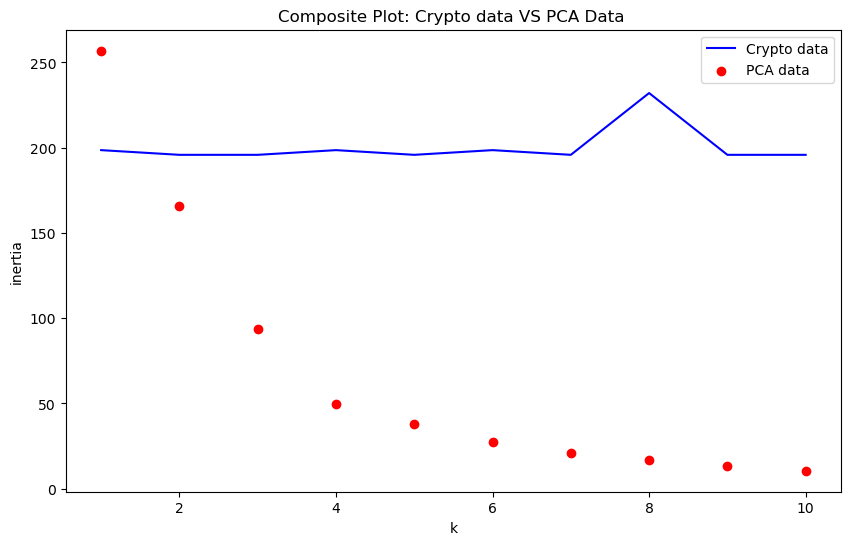

In [108]:
# Composite plot to contrast the Elbow curves
import matplotlib.pyplot as plt
import numpy as np
y1 = elbow_df.inertia
y2 = df_elbow_pca.inertia

x = k
#y1 = inertia
#y2 = inertia

# Create a composite plot
plt.figure(figsize=(10, 6))

# Line plot
plt.plot(x, y1, label='Crypto data', color='blue')

# Scatter plot
plt.scatter(x, y2, label='PCA data', color='red')

# Add titles and labels
plt.title('Composite Plot: Crypto data VS PCA Data ')
plt.xlabel('k')
plt.ylabel('inertia')
plt.legend()

# Show the plot
plt.show() 


# Composite plot to contrast the clusters
# YOUR CODE HERE!
import math
import pandas as pd
import hvplot.pandas
x = df_market_pca_predictions.PCA1
y = df_market_pca_predictions.PCA2
#data =df_market_pca_predictions({"x":x, "y":y})
#mdf1 = pd.DataFrame(data)

x1 = df_market_predictions.price_change_percentage_24h
y2 = df_market_predictions.price_change_percentage_7d
#data_2 = df_market_predictions({"x": x1, "y":y2})
#mdf2 = pd.DataFrame(data_2)
plot1 = df_market_pca_predictions.hvplot.scatter(x="x", y="y", by="MarketClusters")
plot2 = df_market_predictions.hvplot.scatter(x="x1", y="y2", by="MarketClusters")
plot1 * plot2

In [112]:




# Create plots
plot1 = df_market_pca_predictions.hvplot.scatter(x="PCA1", y="PCA2", label="PCA Plot", by="MarketClusters")
plot2 = df_market_predictions.hvplot.scatter(x1="price_change_percentage_24h", y1="price_change_percentage_7d", label="Crypto Data Plot", by="MarketClusters")

# Overlay the plots
overlay_plot = plot1 * plot2

# Display the plot
overlay_plot


:Overlay
   .NdOverlay.PCA_Plot         :NdOverlay   [MarketClusters]
      :Scatter   [PCA1]   (PCA2)
   .NdOverlay.Crypto_Data_Plot :NdOverlay   [Variable]
      :Scatter   [coin_id]   (value)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Fewer clusters should give more clarity 